## 3. 트랜스포머 (Transformer)

- Transformer 모델은 2017년 "Attention Is All You Need" 논문에서 소개된 혁신적인 딥러닝 아키텍처입니다.  
이 모델은 자연어 처리(NLP) 분야에 큰 변화를 가져왔으며, 현재 대부분의 최신 언어 모델의 기반이 되고 있습니다.  

- 이전의 RNN, LSTM과 같은 모델은 다음과 같은 문제점을 가지고 있었습니다.
    - **순차적 처리**: 문장을 단어 단위로 순차적으로 처리하여 병렬화가 어려웠습니다.
    - **장기 의존성 문제**: 긴 문장에서 멀리 떨어진 정보를 연결하는데 어려움이 있었습니다.
    - **계산 복잡도**: 입력 시퀀스가 길어질수록 계산 시간이 기하급수적으로 증가했습니다.

- Transformer 모델은 병렬 처리가 가능한 Self-Attention 메커니즘을 중심으로 설계되었으며, 기존 모델의 제약을 극복하는 데 초점을 맞추고 있습니다.
  - **병렬 처리**: Self-Attention 메커니즘을 통해 전체 입력을 동시에 처리합니다.
  - **장거리 의존성 포착**: 문장 내 모든 단어 간의 관계를 직접적으로 모델링합니다.
  - **확장성**: 대규모 데이터셋에서도 효율적으로 학습이 가능합니다.

* 논문 링크: [Attention is All You Need](https://arxiv.org/abs/1706.03762)
* 참고: https://wikidocs.net/31379

  <img src="https://images.velog.io/images/jekim5418/post/79d1b604-b9eb-47a2-b6b1-0e3d158f955d/Transformer%20architecture.png" width="400">

트랜스포머는 기계번역 작업에서 더 적은 연산량으로 당시 최고 수준을 달성했습니다.  
어떻게 이러한 혁신이 가능했는지 차근차근 알아보겠습니다.

<img src="image/transformer_table.png" width="600"> 

### 3.1 핵심 개념 : Self-Attention

Transformer의 전체 구조를 살펴보기 전에, 먼저 **가장 중요한 핵심 메커니즘인 Self-Attention**을 가볍게 살펴보겠습니다.

Self-Attention은 Transformer가 **문맥을 이해하는 방식의 핵심**입니다.  
입력에서 출력으로 이어지는 전체 흐름을 보기 전에,  
“Transformer는 문장을 어떻게 이해하려고 하는가?”라는 관점에서 먼저 접근해봅니다.

#### **Self-Attention: 문맥 이해의 핵심**

Self-Attention은 입력 시퀀스 안에서 **각 토큰이 다른 모든 토큰과 얼마나 관련이 있는지**를 계산하는 메커니즘입니다.

즉, 모델은 각 단어를 처리할 때  
> “이 단어를 이해하기 위해 문장 안의 어떤 단어를 얼마나 참고해야 할까?”  
를 스스로 판단합니다.

Self-Attention은 다음과 같은 절차로 동작합니다.

1. 각 입력 토큰으로부터 **Query, Key, Value 벡터**를 생성합니다.
2. Query와 모든 Key의 내적을 계산하여 **토큰 간의 연관성 점수**를 구합니다.
3. 이 점수를 Value에 가중합하여 **문맥이 반영된 새로운 표현**을 만듭니다.

이 과정은 문장 내 모든 토큰에 대해 **동시에(parallel)** 수행됩니다.

#### Self-Attention이 만들어내는 문맥 이해

예를 들어 다음 문장을 보겠습니다.

> **“길에서 바나나를 먹는 원숭이를 보았다.  
> 그것은 맛있어 보였다.”**

사람은 자연스럽게  
**‘그것은’이 ‘바나나’를 가리킨다**는 것을 이해합니다.

하지만 모델의 입장에서는 `그것은`이  
- 길을 가리키는지,
- 원숭이를 가리키는지,
- 바나나를 가리키는지

를 단순한 순차 처리만으로 판단하기는 쉽지 않습니다.

Transformer는 Self-Attention을 통해  
문장 안의 모든 단어 토큰 간의 연관성을 한 번에 계산하고,  
그중 **가장 중요한 연결 관계에 집중**할 수 있게 됩니다.

그 결과, `그것은`이 ‘바나나’와 가장 강하게 연결되어 있다는 점을  
모델 스스로 학습할 수 있습니다.

Self-Attention은 이처럼 문장을 왼쪽에서 오른쪽으로 단순히 읽는 것이 아니라,  
**문장 전체를 동시에 바라보며 중요한 관계를 찾아내는 방식**으로  
문맥을 이해하도록 만들어줍니다.

### 3.2 핵심 개념 : **병렬 처리** (효율성의 비결)

<img src="https://ars.els-cdn.com/content/image/1-s2.0-S0926580521000595-gr4.jpg">

Transformer의 또 다른 핵심 특징은 **GPU와 같은 병렬 처리 하드웨어를 최대한 활용할 수 있다는 점**입니다.

이는 단순히 “연산이 빠르다”는 의미를 넘어,  
대규모 데이터셋과 대형 모델을 **현실적인 시간 안에 학습 가능하게 만든 핵심 요인**입니다.

#### 복습 : 왜 기존 모델은 병렬 처리가 어려웠을까?

RNN이나 LSTM과 같은 순환 신경망은 **이전 시점의 계산 결과가 다음 시점의 입력에 직접적으로 의존**합니다.

즉,

- 첫 번째 토큰을 처리해야
- 두 번째 토큰을 처리할 수 있고
- 그 결과가 있어야 세 번째 토큰으로 넘어갈 수 있습니다.

이러한 구조적 특성 때문에 토큰 단위의 연산을 **순차적으로 처리할 수밖에 없으며**,  
GPU의 병렬 연산 능력을 충분히 활용하기 어렵습니다.


### Transformer는 무엇이 다를까?

Transformer는 Self-Attention 구조를 통해 **문장 전체의 모든 토큰을 한 번에 처리**합니다.

각 토큰은 서로를 참고하지만,  
계산 자체는 **이전 토큰의 결과를 기다릴 필요 없이 동시에 수행**됩니다.

그 결과,

- 모든 토큰의 Attention 계산
- 모든 벡터 변환 연산

을 GPU 상에서 **병렬로 처리할 수 있습니다.**

#### 비유: 공장 생산 라인

이 차이를 공장 생산 과정에 비유할 수 있습니다.

- **RNN / LSTM**  
  하나의 생산 라인에서 제품을 **앞 단계가 끝날 때까지 기다리며** 순차적으로 조립하는 방식

- **Transformer**  
  여러 생산 라인에서 부품을 **동시에 생산한 뒤**, 마지막에 조립하는 방식

Transformer는 이 구조 덕분에 생산량(처리 속도)을 획기적으로 늘릴 수 있습니다.

#### 병렬 처리가 가져온 변화

이러한 병렬 처리 가능성 덕분에 Transformer는

- 학습 속도의 대폭 향상
- 대규모 데이터셋 학습 가능
- 모델 크기 확장(수억~수천억 파라미터)

을 가능하게 만들었고, 이는 오늘날 대형 언어 모델(LLM)의 기반이 되었습니다.

즉, Transformer의 성공은  
**모델 구조의 성능뿐 아니라, 하드웨어 친화적인 설계**에서 비롯되었다고 볼 수 있습니다.

### 3.3 구성 요소

이제부터 입력부터 출력까지 트랜스포머의 모든 구성요소들에 대해 자세히 리뷰해보겠습니다. 

> 아래 요소들은 **인코더와 디코더가 공통으로 사용하는 기본 블록**입니다.  
> 디코더는 여기에 마스크드 Self-Attention과 인코더-디코더 Attention이 추가됩니다.

#### **입력 임베딩 (Input Embedding)**

- **역할**: 텍스트 입력(단어 또는 토큰)을 모델이 처리할 수 있는 **연속적인 벡터 공간**으로 변환
- **의도**: 이산적인 토큰 ID를 **의미 정보를 담은 실수 벡터**로 표현하기 위함

##### 토큰 → 벡터 변환은 어떻게 이루어질까?

Transformer에서 입력 임베딩은  
**임베딩 행렬(Embedding Matrix)** 을 이용한 **룩업 테이블(lookup table) 방식**으로 수행됩니다.

- 전체 어휘 크기를 `V`
- 임베딩 차원을 `d_model`이라 하면  
- 임베딩 행렬의 크기는 `V × d_model`

각 토큰은 이 행렬에서 **자신의 ID에 해당하는 한 행(row)** 을 가져옵니다.

##### 예시

> **“고양이는 귀엽다”**

1. 토큰화 후 각 단어를 고유한 ID로 변환  
   - 고양이 → 1  
   - 는 → 2  
   - 귀엽다 → 3  

2. 임베딩 행렬에서 해당 ID의 행을 조회  
   - 고양이 → `E[1] = [0.1, 0.3, -0.2, ...]`
   - 는 → `E[2] = [0.5, -0.1, 0.4, ...]`
   - 귀엽다 → `E[3] = [-0.2, 0.7, 0.1, ...]`

이렇게 얻어진 벡터들이 Transformer의 실제 입력이 됩니다.

##### 중요한 점

- 이 임베딩 벡터들은 **학습 과정에서 함께 업데이트되는 파라미터**입니다.
- 즉, 임베딩은 고정된 규칙이 아니라 **모델이 데이터로부터 의미를 학습해 나가는 표현 공간**입니다.
- 의미적으로 비슷한 단어들은 학습이 진행될수록 **벡터 공간에서도 가까워지게 됩니다.**

입력 임베딩은 이후 단계에서  
**위치 정보(Positional Encoding)** 와 결합되어,  
Transformer가 문장의 구조와 순서를 함께 이해할 수 있도록 합니다.

#### **포지셔널 인코딩(Positional Encoding):**

* 챗봇, 번역기 등에서 어순은 굉장히 중요함. 어순에 따라 의미가 완전히 반대가 될 수 있음
  - 예시 : 사람이 개를 쫓는다 vs 개를 사람이 쫓는다
* 기존의 RNN은 단어의 위치를 따라 순차적으로 입력받아 단어의 위치정보를 활용할 수 있었음
* 트랜스포머의 경우, RNN을 활용하지 않았기 때문에 단어의 위치정보를 다른 방식으로 줄 필요가 있음
* 이를 위해 **각 단어의 임베딩 벡터에 위치 정보들을 더하게 되는데** 이를 포지셔널 인코딩이라 함
* 보통 포지셔널 인코딩은 sin, cos을 이용하여 계산

<img src="https://kazemnejad.com/img/transformer_architecture_positional_encoding/model_arc.jpg" width="700">

- 역할: 시퀀스에서 각 단어의 위치 정보를 제공.
- 의도: Transformer가 순서를 알 수 있도록 보완.
- 동작 방식: 사인(sin)과 코사인(cos) 함수로 생성된 고정 위치 정보 추가.
- 수학적 표현
  - $ PE(pos, 2i) = sin(pos / 10000^{2i/d_{model}}) $
  - $ PE(pos, 2i+1) = cos(pos / 10000^{2i/d_{model}}) $
  - 여기서 *pos*는 단어의 위치, *i*는 차원을 나타냅니다.

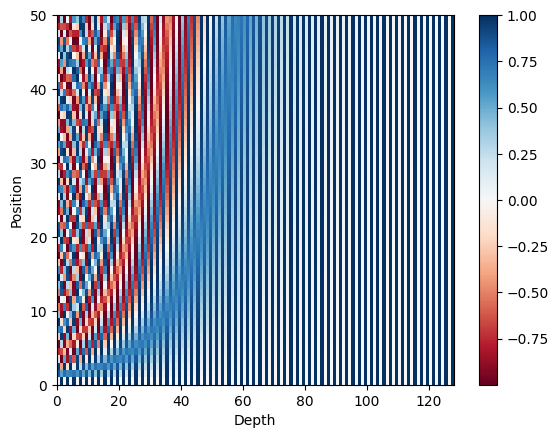

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn


class PositionalEncoding(nn.Module):
    """
    PyTorch 버전 포지셔널 인코딩 모듈.
    입력 텐서 shape: (batch_size, seq_len, d_model)
    """
    def __init__(self, max_seq_len: int, d_model: int):
        super().__init__()

        # pos: (max_seq_len, 1)
        position = torch.arange(0, max_seq_len, dtype=torch.float32).unsqueeze(1)
        # div_term: (d_model/2,)
        div_term = torch.exp(
            torch.arange(0, d_model, 2, dtype=torch.float32)
            * (-math.log(10000.0) / d_model)
        )

        # pe: (max_seq_len, d_model)
        pe = torch.zeros(max_seq_len, d_model, dtype=torch.float32)
        pe[:, 0::2] = torch.sin(position * div_term)  # 짝수 인덱스
        pe[:, 1::2] = torch.cos(position * div_term)  # 홀수 인덱스

        # 배치 차원 추가: (1, max_seq_len, d_model)
        pe = pe.unsqueeze(0)

        # 학습 파라미터는 아니지만, 모델과 함께 GPU로 이동되도록 buffer로 등록
        self.register_buffer("pos_encoding", pe)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """
        x: (batch_size, seq_len, d_model)
        """
        seq_len = x.size(1)
        # 앞 seq_len 만큼의 포지셔널 인코딩을 더해줌
        return x + self.pos_encoding[:, :seq_len, :]


# 샘플 포지셔널 인코딩 시각화
sample_pos_encoding = PositionalEncoding(50, 128)  # 위치 크기 50, 임베딩 차원 128
pe_np = sample_pos_encoding.pos_encoding[0].cpu().numpy()  # (50, 128)

plt.pcolormesh(pe_np, cmap='RdBu')
plt.xlabel('Depth')        # x축: 임베딩 차원
plt.xlim((0, 128))
plt.ylabel('Position')     # y축: 위치
plt.colorbar()
plt.show()

### **Self Attention:**

Seq2Seq의 어텐션은 입력 시퀀스와 출력 시퀀스 간의 어텐션이었다면, 트랜스포머의 셀프 어텐션은 입력 문장 내에서 단어간 관계성을 파악하는 과정입니다.

<img src="image/selfattention.png">

이미지 출처 : https://www.researchgate.net/figure/An-example-of-the-self-attention-mechanism-following-long-distance-dependency-in-the_fig1_350714675

### **Multi-Head Attention:**


- 역할: Self-Attention을 병렬적으로 여러 관점(또는 하위 공간)에서 계산하여 더 풍부하고 다양한 문맥 정보를 추출
- 의도: 문장 내 토큰 간의 여러 관계를 동시에 학습하여 복잡한 의존성을 효과적으로 모델링
- 목적: 문맥 정보와 의존성을 다각도로 포착해 더 정확한 표현 학습을 가능하게 함.
- 동작 방식:

  <img src = "image/mha_img_original.png" width="300">

입력 벡터를 Query, Key, Value로 선형 변환 (세 가지 행렬 곱)

<img src = "image/key-query-value.png" width="600">


각 Head에서 독립적으로 Self-Attention 계산 (스케일 조정된 점곱 연산 포함)

<img src = "image/multiheadattention.png" width="500">

각 Head의 출력을 Concatenate한 뒤 다시 선형 변환으로 결합.

<img src = "image/transformer_attention.png" width="500">


Attention을 통해 학습된 문맥적으로 강화된 임베딩

<img src="image/concat.png" width="400">

이미지출처 : https://wikidocs.net/31379

결과 : 입력 문장의 각 토큰 간 상관관계를 도출해 문맥과 의미를 보다 풍부하게 표현 가능

비유: 다각도로 문장 분석하기
- **문법 전문가**: 문장 구조에 집중.
- **의미론 전문가**: 단어의 의미 관계에 집중.
- **문맥 전문가**: 전체적인 맥락에 집중.

인코더는 **Self-Attention 블록**만 쌓아 입력 문장을 인코딩하고,  
디코더는 거기에 **마스크드 Self-Attention + 인코더-디코더 Attention**을 추가하여 다음 단어를 생성합니다.

### **Residual Connection(Add):**
Residual Connection은 각 하위 계층(Sublayer)의 출력을 입력과 더하는 구조입니다.  

<img src="https://miro.medium.com/v2/resize:fit:1400/1*UMHrHYPxQ6KmN89dutvyCQ.png" width="500">

**수식 표현**:

$\text{Output} = \text{LayerNorm}(x + \text{Sublayer}(x))$
  
  여기서:
  - $ x $: 하위 계층에 입력된 값.
  - $\text{Sublayer}(x)$: Self-Attention 또는 FFNN 층의 출력.
  - $\text{LayerNorm}$: 신경망의 각 토큰 벡터(feature 차원) 내에서 평균을 0, 분산을 1로 정규화하여  
값의 분포를 안정화하고 학습을 안정적으로 유지하도록 하는 Layer Normalization

- **의도**:
  - 입력과 출력의 정보를 결합하여 모델이 더 풍부한 표현을 학습할 수 있도록 함.
  - 네트워크가 깊어질수록 발생하는 기울기 소실 문제를 완화.

이를 통해 정보 손실을 방지하고 학습을 안정화할 수 있습니다.
- 역할: 입력과 출력의 합을 계산하여 기울기 소실 문제 완화.
- 목적: 정보 손실 방지 및 학습 안정성 제공.

### **Layer Normalization:**
Layer Normalization은 각 계층의 출력을 정규화하여 학습 과정을 안정화합니다.
- **수식 표현**:

$$
y = \frac{x - \mu}{\sqrt{\sigma^2 + \epsilon}} \cdot \gamma + \beta
$$

  여기서:
  - $x$: 한 샘플(또는 토큰)의 feature 벡터
  - $\\mu $: 해당 샘플의 feature 평균
  - $\\sigma$: 해당 샘플의 feature 표준편차
  - $\\epsilon$: 매우 작은 값 (0으로 나누는 것을 방지)
  - $\\gamma$, $\beta $: 학습 가능한 스케일(scale) 및 시프트(shift) 파라미터
    - 정규화 과정에서 모델의 표현력이 떨어질 수 있기 때문에 γ(감마)와 β(베타)가 다시 그 표현력을 복원

- **작동 방식**:
  - 각 계층에서 입력 데이터를 정규화하여 평균과 분산을 일정하게 유지.
  - 학습 속도를 높이고, 불안정한 변화(Gradient Explosion/Vanishing)를 방지.

- 역할: 각 층의 출력을 정규화하여 학습 안정성 향상.
- 의도: 학습 과정에서의 성능 저하 방지.

### **Residual Connection과 Layer Normalization의 조합**

Transformer는 **Residual Connection**과 **Layer Normalization**을 조합하여 다음과 같은 이점을 제공합니다:

1. **정보 손실 방지**: Residual Connection이 입력 정보를 직접 전달.
2. **학습 안정화**: Layer Normalization이 출력 값을 정규화.
3. **효율적인 학습**: 두 메커니즘의 결합으로 모델이 빠르게 수렴.

### **Feed-Forward Neural Network (FFNN):**
- Attention 층 다음에 오는 완전 연결 층으로 비선형성을 도입하여 모델의 표현력을 높입니다.
- 역할: Attention 결과를 변환하여 더 높은 차원의 표현 학습.
- 의도: 비선형 변환을 통한 복잡한 패턴 학습.

### **Output Layer:**
- 역할: Transformer의 마지막 층으로, 예측을 생성.
- 목적: 텍스트 생성, 분류 등 다양한 태스크 수행.


## 4.Transformer의 주요 동작 단계

Transformer는 입력 문장에서부터 최종 출력 결과를 생성하기까지 다음과 같은 과정을 거칩니다:

1. **입력 문장의 토큰화 및 임베딩**  
  - 입력 문장을 단어 또는 서브워드 단위로 토큰화합니다.  
  - 각 토큰을 고차원 벡터로 변환하여 텍스트 데이터를 수치적으로 표현합니다.  

    <img src="image/text_input.png" width="400">


2. **포지셔널 인코딩 추가**  
   - 각 토큰의 위치 정보를 포지셔널 인코딩 벡터로 표현하여 입력 임베딩에 더합니다.  
   - 이는 모델이 입력 시퀀스의 순서를 이해할 수 있도록 돕습니다.

   <img src="image/positional_encoding.png" width="400">

3. **인코더에서 Self-Attention과 FFNN 적용**  
   - Self-Attention 메커니즘을 통해 입력 시퀀스의 각 토큰이 다른 토큰과의 관계를 계산하여 문맥을 이해합니다.  
   - Multi-Head Attention을 사용해 다양한 관점에서 관계를 분석합니다.  
   - FFNN을 통해 비선형 변환을 수행하여 복잡한 패턴을 학습합니다.  
   - Residual Connection과 Layer Normalization으로 안정성을 유지합니다.

4. **디코더에서 마스크드 Self-Attention, 인코더-디코더 Attention, FFNN 적용**  
   - 디코더는 이전 단계에서 생성된 단어를 기반으로 마스크드 Self-Attention을 수행하여 다음 단어를 예측합니다.  
   - 인코더-디코더 Attention을 통해 인코더의 출력과 디코더의 입력 간의 관계를 모델링합니다.  
   - FFNN으로 출력 특징을 변환하고 Residual Connection과 Layer Normalization으로 안정성을 유지합니다.

5. **최종 출력 생성**  
   - 디코더의 마지막 층에서 결과를 생성합니다.  
   - 이를 통해 텍스트 생성, 번역, 요약 등 다양한 자연어 처리 태스크를 수행합니다.


### 간단한 요약

Transformer에서 **다음 단어를 예측할 때**는  
- 인코더가 입력 시퀀스를 문맥 벡터들로 표현하고,  
- 디코더가 이 인코더 출력 + 지금까지 생성된 단어를 함께 보면서 Self-Attention으로 다음 단어를 고른다고 볼 수 있습니다.

핵심 처리 단계만 정리하면:

1. **토큰화 + 임베딩 + 포지셔널 인코딩**으로 "순서 있는 벡터 시퀀스" 만들기  
2. 인코더에서 **Self-Attention + FFNN + Residual/LayerNorm** 블록을 여러 번 쌓아 문맥 표현 학습  
3. 디코더에서 **마스크드 Self-Attention + 인코더-디코더 Attention**으로 입력·출력 양쪽 문맥을 함께 참고  
4. 마지막 선형층에서 **다음 단어 확률 분포** 출력  

이 흐름 덕분에 Transformer는 긴 문맥과 복잡한 의존성을 잘 포착하면서도 병렬 처리가 가능합니다.

## 5.Transformer의 의의와 영향
- 성능 향상: 기계 번역, 텍스트 요약, 질문 답변 등에서 최고 성능을 달성.
- 확장성: GPT, BERT와 같은 대규모 언어 모델의 기반.
- 범용성: NLP를 넘어 컴퓨터 비전, 음성 인식 등 다양한 분야로 확장 가능.

Transformer 모델은 그 혁신적인 구조와 뛰어난 성능으로 현대 NLP의 중심이 되었습니다.  
병렬 처리 능력과 장거리 의존성 포착 능력은 이전 모델들의 한계를 극복했으며, 이는 더 큰 모델과 더 다양한 응용으로 이어지고 있습니다.  
앞으로도 Transformer는 AI 발전의 핵심 요소로 계속 진화할 것으로 예상됩니다.


## 6. 복습 문제

#### 문제 1. Transformer는 왜 RNN을 완전히 대체할 수 있었는가?  
Seq2Seq + Attention이 있었는데도 Transformer가 구조적으로 제공한 "결정적 장점"을 설명하세요.

<details><summary>정답 보기</summary>

→ Transformer는 RNN처럼 순차적으로 토큰을 처리할 필요가 없어 전체 시퀀스를 병렬로 연산할 수 있는데, 이 병렬성은 학습 속도를 획기적으로 높이고, self-attention이 장거리 의존성까지 안정적으로 포착해 성능까지 상승시키기 때문에 RNN 기반 구조를 대체할 수 있게 되었다.

</details>

#### 문제 2. Multi-Head Attention이 단일 Attention보다 더 나은 이유  
단순히 여러 관점을 본다가 아니라, **왜 여러 개로 나누는 것이 구조적으로 유리한지** 설명하세요.

<details><summary>정답 보기</summary>

→ 하나의 큰 attention 공간에서 모든 패턴을 동시에 학습하면 특정 방향으로 편향되기 쉬운데, 여러 head로 공간을 분리하면 각 head가 서로 다른 하위 표현(subspace)에 특화된 패턴을 독립적으로 학습해 정보 손실을 줄이고, 다양한 관계를 풍부하게 표현할 수 있기 때문이다.

</details>


#### 문제 3. Decoder에 Encoder-Decoder Attention이 없다면 어떤 문제가 생기는가?  
입력 문장을 사용하지 못할 때 출력 품질이 어떻게 무너지는지 설명하세요.

<details><summary>정답 보기</summary>

→ Decoder가 입력 문장을 직접 참조할 수 없으면 출력이 입력 의미와 연결되지 않고 단순 언어 모델처럼 내부적으로만 일관된 문장을 생성해, 번역·요약처럼 입력 의미를 반영해야 하는 작업에서 심각한 의미 왜곡이 발생한다.

</details>


#### 문제 4. Self-Attention이 O(n²)라 비싸지만 Transformer가 선택한 이유  
단점보다 장점이 큰 이유를 논리적으로 설명하세요.

<details><summary>정답 보기</summary>

→ Self-attention은 모든 토큰 쌍의 상호 관계를 직접 계산하기 때문에 계산량은 많지만, 그 덕분에 RNN이 처리하지 못하는 장거리 의존성을 안정적으로 학습할 수 있고, 동시에 모든 토큰을 병렬 처리할 수 있어 전체 훈련 시간 측면에서는 오히려 효율적이기 때문이다.

</details>


#### 문제 5. Attention 외에 FeedForward Network(FFN)도 필요한 이유 
“비선형성 추가” 말고, 왜 구조적으로 FFN이 반드시 필요한가?

<details><summary>정답 보기</summary>

→ Attention은 관계를 조합하는 데 특화되어 있지만 각 토큰 자체의 표현을 깊게 변형시키는 능력은 제한적이므로, FFN이 토큰별로 비선형 변환을 추가함으로써 attention이 포착한 관계를 더 풍부한 고차원 표현으로 확장해 모델의 표현력을 크게 높여 준다.

</details>


#### 문제 6. Residual Connection을 제거하면 학습이 어려워지는 이유  
단순 "gradient vanishing"이 아니라 구조적으로 왜 발생하는지 설명하세요.

<details><summary>정답 보기</summary>

→ Residual connection이 없으면 각 층이 입력 전체 변환을 직접 학습해야 하므로,  
 깊어질수록 함수 합성이 어려워지고 identity mapping조차 학습하기 힘들어진다.  
Residual은 각 층이 입력에 대한 보정(residual)만 학습하도록 구조를 바꾸어,  
깊은 네트워크에서도 최적화가 가능하게 한다.

</details>

#### 문제 7. Encoder에는 Masked Self-Attention이 필요 없는 이유  
왜 Encoder는 미래 토큰을 가려야 할 필요가 없는지 논리적으로 설명하세요.

<details><summary>정답 보기</summary>

→ Encoder는 입력 전체를 한 번에 해석해야 입력 문장의 양방향 문맥을 정확히 파악할 수 있으므로, 미래 토큰을 가리면 문장의 전체 의미 구조를 훼손하게 되어 모델의 인식 능력이 떨어지기 때문이다.

</details>


#### 문제 8. Transformer가 Seq2Seq + Attention 대비 혁신적이었던 이유  
단순 구조 변화가 아니라 “왜 혁신이었는지” 설명하세요.

<details><summary>정답 보기</summary>

→ 기존 Seq2Seq는 RNN 구조적 특성 때문에 토큰을 순서대로 처리해야 해 병렬화가 불가능했지만, Transformer는 self-attention 기반으로 전체 시퀀스를 한 번에 처리하며 순차 의존성을 제거해 학습 속도와 성능을 동시에 크게 개선했기 때문에 혁신적이었다.

</details>

#### 문제 9. Attention Score가 Softmax를 사용하는 이유  
왜 Sigmoid나 ReLU가 아닌 Softmax인지 개념적으로 설명하세요.

<details><summary>정답 보기</summary>

→ Self-attention은 여러 위치 중 어떤 위치에 “상대적으로 더 집중할지”를 결정해야 하는데 softmax는 전체 토큰 점수를 하나의 확률 분포로 변환하여 각 위치의 중요도를 자연스럽게 비교 가능하게 만들기 때문에 attention 가중치로 이상적이다.

</details>

## 7. Transformer 기계 번역 실습 (영 -> 한)

In [2]:
from datasets import load_dataset
from transformers import AutoTokenizer

# 1) 병렬 말뭉치 로드: 영어(en) ↔ 한국어(ko) 쌍이 들어 있음
dataset = load_dataset("strongminsu/ko-en-structured-translations")

# 2) 한국어-영어 양방향 ELECTRA 토크나이저 로드
#    - CLS 토큰(id=2)이 “시작” 역할을 할 것
#    - SEP 토큰(id=3)이 “문장 끝(EOS)” 역할을 할 것
tokenizer = AutoTokenizer.from_pretrained("tunib/electra-ko-en-small")

# 학습/평가 셔플
dataset_train = dataset["train"].shuffle(seed=42)
dataset_test = dataset["test"].shuffle(seed=42)

max_length = 64 # 문장을 토큰 64개 길이로 자르고/패딩

def preprocess_function(examples):
    # text/text_target를 동시에 넘기면 HF가 알아서 labels를 만들어 줌
    # padding="max_length"로 길이를 맞추면 DataLoader가 바로 텐서 배치를 만들 수 있음
    model_inputs = tokenizer(
        text=examples["en"],       # 인코더 입력: 영어
        text_target=examples["ko"],# 디코더 타깃: 한국어
        truncation=True,           # max_length 넘으면 잘라서 메모리/학습 안정
        padding="max_length",      # 길이를 고정 → batch 텐서화 용이
        max_length=max_length,
    )
    return model_inputs

# 4) 토크나이징 + PyTorch 텐서 포맷 지정 (input_ids/labels만 남김)
tokenized_dataset_train = dataset_train.map(preprocess_function, batched=True)
tokenized_dataset_train.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])

tokenized_dataset_test = dataset_test.map(preprocess_function, batched=True)
tokenized_dataset_test.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])

Map:   0%|          | 0/950 [00:00<?, ? examples/s]

Transformer 모델 로드 & 학습 (Hugging Face Trainer 사용)

In [3]:

from torch.utils.data import DataLoader
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

batch_size = 32
train_loader = DataLoader(tokenized_dataset_train, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(tokenized_dataset_test, batch_size=batch_size, shuffle=False)

# 특수 토큰 ID: 패딩/시작/끝
pad_id = tokenizer.pad_token_id                     # 손실 계산에서 무시할 패딩
BOS_TOKEN_ID = tokenizer.cls_token_id # 디코더 시작 토큰
EOS_TOKEN_ID = tokenizer.sep_token_id # 디코더 종료 토큰
vocab_size = tokenizer.vocab_size     # 임베딩/출력 차원

Using device: cuda


In [4]:
import math
import torch.nn as nn

class PositionalEncoding(nn.Module):
    """
    Transformer는 토큰 순서를 모름 → sin/cos 파형으로 위치 정보를 임베딩에 더해 준다.
    입력/출력 shape: (seq_len, batch, d_model)
    """
    def __init__(self, d_model, max_len=512):
        super().__init__()
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float32).unsqueeze(1)
        div_term = torch.exp(
            torch.arange(0, d_model, 2, dtype=torch.float32) * (-math.log(10000.0) / d_model)
        )
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(1)  # (max_len, 1, d_model)
        self.register_buffer("pe", pe)

    def forward(self, x):
        # 입력 임베딩에 앞쪽 seq_len만큼의 위치벡터를 더함
        seq_len = x.size(0)
        return x + self.pe[:seq_len]


In [5]:
class TransformerMTModel(nn.Module):
    def __init__(self, vocab_size, d_model=256, nhead=4, num_encoder_layers=2,
                 num_decoder_layers=2, dim_feedforward=512, dropout=0.1):
        super().__init__()
        self.d_model = d_model
        
        # 1) 소스/타깃 임베딩 테이블
        self.src_embed = nn.Embedding(vocab_size, d_model)
        self.tgt_embed = nn.Embedding(vocab_size, d_model)
        
        # 2) 위치 인코딩(인코더/디코더용)
        self.pos_encoder = PositionalEncoding(d_model)
        self.pos_decoder = PositionalEncoding(d_model)

        # 표준 PyTorch Transformer: batch_first=False → (seq_len, batch, dim)
        self.transformer = nn.Transformer(
            d_model=d_model,
            nhead=nhead,
            num_encoder_layers=num_encoder_layers,
            num_decoder_layers=num_decoder_layers,
            dim_feedforward=dim_feedforward,
            dropout=dropout,
            batch_first=False  # (seq_len, batch, d_model)
        )
        # 4) 디코더 출력 → 단어 분포로 투사
        self.fc_out = nn.Linear(d_model, vocab_size)

    def _generate_square_subsequent_mask(self, sz):
        # 디코더가 미래 토큰을 못 보도록 상삼각 -inf 마스크 생성
        mask = torch.triu(torch.ones(sz, sz, device=self.fc_out.weight.device) == 1).transpose(0, 1)
        mask = mask.float().masked_fill(mask == 0, float("-inf")).masked_fill(mask == 1, 0.0)
        return mask

    def forward(self, src, tgt, src_key_padding_mask=None, tgt_key_padding_mask=None):
        """
        src, tgt: (batch, seq_len)
        1) (seq_len, batch)로 전치 → Transformer가 기대하는 입력 모양
        2) 임베딩 + 위치인코딩
        3) 인코더/디코더 실행 + 패딩 마스크 전달
        4) 단어 분포(logits) 반환
        """
        src = src.transpose(0, 1)  # (seq_len, batch)
        tgt = tgt.transpose(0, 1)  # (seq_len, batch)
        
        # 임베딩 스케일링 + 위치인코딩
        src_emb = self.pos_encoder(self.src_embed(src) * math.sqrt(self.d_model))
        tgt_emb = self.pos_decoder(self.tgt_embed(tgt) * math.sqrt(self.d_model))

        # 디코더용 미래 차단 마스크
        tgt_mask = self._generate_square_subsequent_mask(tgt.size(0))

        # 인코더-디코더 패딩 마스크 전달
        memory = self.transformer.encoder(
            src_emb,
            src_key_padding_mask=src_key_padding_mask
        )
        output = self.transformer.decoder(
            tgt_emb,
            memory,
            tgt_mask=tgt_mask,
            tgt_key_padding_mask=tgt_key_padding_mask,
            memory_key_padding_mask=src_key_padding_mask
        )
        logits = self.fc_out(output)  # (seq_len, batch, vocab)
        return logits.transpose(0, 1)  # 다시 (batch, seq_len, vocab)

In [6]:
model = TransformerMTModel(vocab_size=vocab_size, d_model=256, nhead=4,
                           num_encoder_layers=2, num_decoder_layers=2).to(device)

criterion = nn.CrossEntropyLoss(ignore_index=pad_id) # PAD 토큰은 손실에서 제외
optimizer = torch.optim.Adam(model.parameters(), lr=5e-4)

def make_padding_mask(batch_ids, pad_id):
    # PAD 위치를 True로 표시 → Transformer가 어텐션할 때 무시
    return (batch_ids == pad_id)

def train_epoch(model, dataloader, optimizer, criterion, device):
    """
    - 디코더 입력은 정답을 한 칸 오른쪽으로 민 시퀀스([BOS, y0, y1, ...]).
    - 출력 logits과 원래 라벨을 같은 위치에 맞춰서 CE 손실 계산.
    """
    model.train()
    total_loss = 0.0
    for batch in dataloader:
        src = batch["input_ids"].to(device)   # (batch, seq_len)
        trg = batch["labels"].to(device)      # (batch, seq_len)

        # 디코더 입력 만들기: 라벨의 첫 토큰(BOS)을 앞에 두고 오른쪽으로 시프트
        tgt_input = torch.full_like(trg, pad_id)
        #tgt_input[:, 0] = trg[:, 0]       # 이미 BOS가 들어 있음
        tgt_input[:, 0] = BOS_TOKEN_ID
        tgt_input[:, 1:] = trg[:, :-1]

        # 패딩 마스크: PAD 위치 True → 어텐션에서 무시
        src_key_padding_mask = make_padding_mask(src, pad_id)   # (batch, seq_len)
        tgt_key_padding_mask = make_padding_mask(tgt_input, pad_id)

        optimizer.zero_grad()
        logits = model(src, tgt_input,
                       src_key_padding_mask=src_key_padding_mask,
                       tgt_key_padding_mask=tgt_key_padding_mask)  # (batch, seq_len, vocab)

        # (batch, seq_len, vocab) → (batch*seq_len, vocab)로 납작하게 펴서 CE 계산
        vocab_dim = logits.size(-1)
        #loss = criterion(logits.reshape(-1, vocab_dim),trg.reshape(-1))
        loss = criterion(logits[:, 1:, :].reshape(-1, vocab_dim), trg[:, 1:].reshape(-1))
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)  # 기울기 폭주 방지
        optimizer.step()

        total_loss += loss.item()
    return total_loss / len(dataloader)

# 학습 실행
N_EPOCHS = 20 
train_losses = []
for epoch in range(N_EPOCHS):
    loss = train_epoch(model, train_loader, optimizer, criterion, device)
    train_losses.append(loss)
    print(f"Epoch {epoch+1}/{N_EPOCHS} | Train Loss: {loss:.4f}")


/root/micromamba/envs/py310/lib/python3.10/site-packages/torch/nn/modules/transformer.py:382: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
/root/micromamba/envs/py310/lib/python3.10/site-packages/torch/nn/functional.py:5962: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(


Epoch 1/20 | Train Loss: 5.3209
Epoch 2/20 | Train Loss: 3.7625
Epoch 3/20 | Train Loss: 3.1421
Epoch 4/20 | Train Loss: 2.6899
Epoch 5/20 | Train Loss: 2.3195
Epoch 6/20 | Train Loss: 2.0133
Epoch 7/20 | Train Loss: 1.7666
Epoch 8/20 | Train Loss: 1.5272
Epoch 9/20 | Train Loss: 1.3581
Epoch 10/20 | Train Loss: 1.1769
Epoch 11/20 | Train Loss: 1.0287
Epoch 12/20 | Train Loss: 0.9111
Epoch 13/20 | Train Loss: 0.8251
Epoch 14/20 | Train Loss: 0.7285
Epoch 15/20 | Train Loss: 0.6505
Epoch 16/20 | Train Loss: 0.6010
Epoch 17/20 | Train Loss: 0.5408
Epoch 18/20 | Train Loss: 0.4854
Epoch 19/20 | Train Loss: 0.4624
Epoch 20/20 | Train Loss: 0.4297


In [7]:
def translate_with_transformer(model, tokenizer, sentence, max_len=64):
    model.eval()
    with torch.no_grad():
        ## 1) 입력 문장 토크나이즈 (배치=1)
        enc = tokenizer(sentence, truncation=True, max_length=max_len)
        # enc["input_ids"]: [tok1, tok2, ...]
        src_ids = torch.tensor([enc["input_ids"]], dtype=torch.long, device=device)  # (1, src_len)
        src_key_padding_mask = make_padding_mask(src_ids, pad_id)

        # 2) 인코더 통과
        src = src_ids.transpose(0, 1)  # (src_len, 1)
        src_emb = model.pos_encoder(model.src_embed(src) * math.sqrt(model.d_model))
        memory = model.transformer.encoder(
            src_emb,
            src_key_padding_mask=src_key_padding_mask
        )

        # 3) 디코더 초기 입력: BOS
        ys = torch.tensor([[tokenizer.cls_token_id]], device=device)  # (1, 1)
        
        # 4) 토큰 하나씩 생성 (greedy)
        for _ in range(max_len - 1):
            tgt = ys.transpose(0, 1)  # (seq_len, 1)
            tgt_emb = model.pos_decoder(model.tgt_embed(tgt) * math.sqrt(model.d_model))
            tgt_mask = model._generate_square_subsequent_mask(tgt.size(0)) # 미래 차단

            out = model.transformer.decoder(
                tgt_emb,
                memory,
                tgt_mask=tgt_mask,
                memory_key_padding_mask=src_key_padding_mask
            )
            logits = model.fc_out(out[-1, 0, :])  #  마지막 시점 로짓만 사용
            next_token = logits.argmax(-1).unsqueeze(0).unsqueeze(0)  # (1,1)
            ys = torch.cat([ys, next_token], dim=1)  # 생성 토큰을 이어붙임

            # EOS(SEP)가 나오면 종료
            if next_token.item() == tokenizer.sep_token_id: # 해당 토크나이저에서는 종료토큰 sep_token_id
                break

        pred_ids = ys[0].tolist()
        return tokenizer.decode(pred_ids, skip_special_tokens=True)

In [158]:
# 예시 번역
sample = next(iter(train_loader))

# 1) 소스 문장 (영어) 텐서 준비
src_sample = sample['input_ids'][0].unsqueeze(0).to(device)  # shape: (1, seq_len)

# 1) 정답 문장 (영어) 텐서 준비
ans_sample = sample['labels'][0].unsqueeze(0).to(device)  # shape: (1, seq_len)


# 토큰 → 문자열로 복원해 비교
src_text = tokenizer.decode(src_sample[0].tolist(), skip_special_tokens=True)
ref_text = tokenizer.decode(ans_sample[0].tolist(), skip_special_tokens=True)
print("영어 원문 :", src_text)
print("\n정답 번역 :", ref_text)
print("\n모델 번역:", translate_with_transformer(model, tokenizer, src_text))

영어 원문 : Various exhibitions are held at the art museums in Korea.

정답 번역 : 한국의 미술관에서는 다양한 전시가 열리고 있어요.

모델 번역: 한국의 미술관에서는 다양한 예술 형식에서 한국에서 한국에서의 미술관이 풍부해요.


In [154]:
# 예시 번역
sample = next(iter(test_loader))

# 1) 소스 문장 (영어) 텐서 준비
src_sample = sample['input_ids'][0].unsqueeze(0).to(device)  # shape: (1, seq_len)

# 1) 정답 문장 (영어) 텐서 준비
ans_sample = sample['labels'][0].unsqueeze(0).to(device)  # shape: (1, seq_len)


# 토큰 → 문자열로 복원해 비교
src_text = tokenizer.decode(src_sample[0].tolist(), skip_special_tokens=True)
ref_text = tokenizer.decode(ans_sample[0].tolist(), skip_special_tokens=True)
print("영어 원문 :", src_text)
print("\n정답 번역 :", ref_text)
print("\n모델 번역:", translate_with_transformer(model, tokenizer, src_text))

영어 원문 : I found a new café.

정답 번역 : 새로운 카페 발견했어.

모델 번역: 새로운 카페를 발견했어.


다음 노트에서는 Transformer를 기반으로 한 대표 사전학습 모델 BERT/GPT를 자세히 살펴봅니다